<a href="https://colab.research.google.com/github/SwanMassart/MLF/blob/main/Lab_6withoutconvolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
(50000, 32, 32, 3)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.1844 - loss: 3.5514 - val_accuracy: 0.3258 - val_loss: 3.2121
Epoch 2/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.3000 - loss: 3.2405 - val_accuracy: 0.3623 - val_loss: 3.0652
Epoch 3/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.3355 - loss: 3.0971 - val_accuracy: 0.3765 - val_loss: 2.9571
Epoch 4/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.3536 - loss: 2.9859 - val_accuracy: 0.3941 - val_loss: 2.8495
Epoch 5/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.3692 - loss: 2.8950 - val_accuracy: 0.4119 - val_loss: 2.7624
Epoch 6/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 23ms/step - accuracy: 0.3803 - loss: 2.8080 - val_accuracy: 0.4212 - val_loss: 2.6817
Epoch 7/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.3897 - loss: 2.7372 - val_accuracy: 0.4311 - val_loss: 2.6142
Epoch 8/40
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.4056 - loss: 2.6604 - 

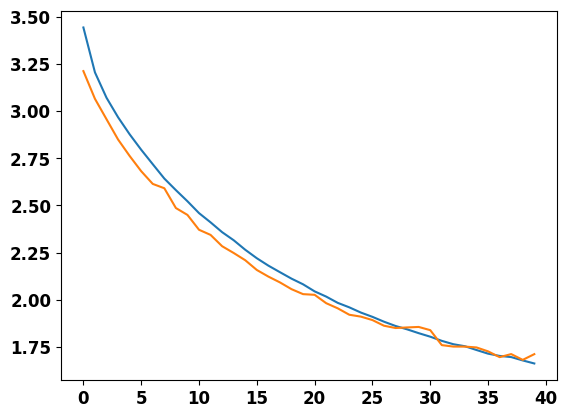

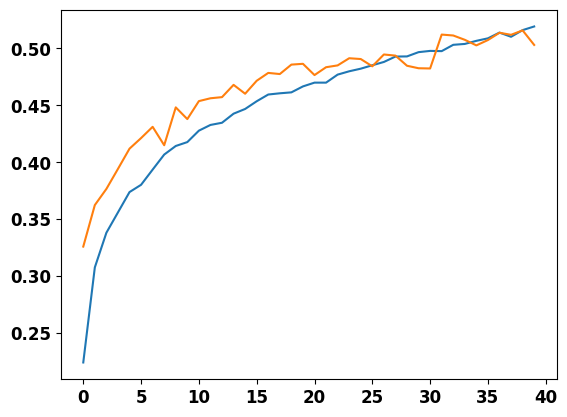

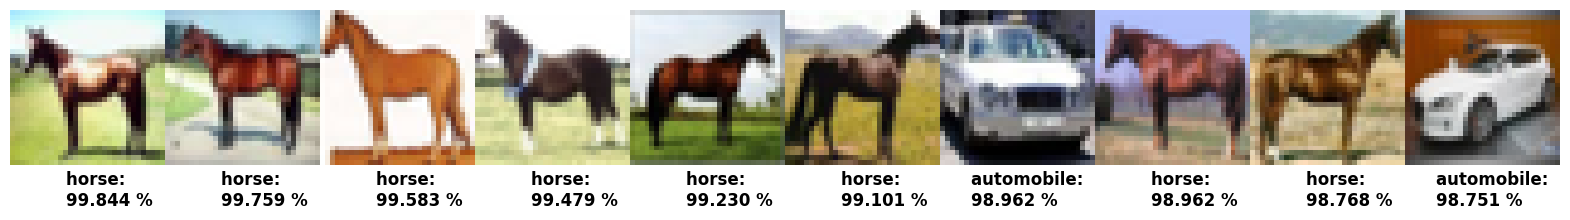

'I experimented with various optimizations to improve our CIFAR-10 classification model.\n Initially, our simple dense network with SGD (lr=0.01) reached around 10% test accuracy. \n I then increased model complexity by adding more layers (512 → 256 → 128) and Dropout (0.3), which improved stability but only slightly boosted accuracy to 51.7%.\n Implementing learning rate scheduling (ReduceLROnPlateau) helped the model adapt better, reducing loss fluctuations. Testing different batch sizes (64 vs. 256) showed that 64 worked best for generalization. \n  However, Batch Normalization did not improve performance, so we removed it. With these optimizations, I reached 53% test accuracy. \n  To push beyond 55%, I tried experiment with Adam optimizer,but it decreased training epochs performances'

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 18 09:04:44 2025

@author: Swan
"""

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

from keras.optimizers import Adam
from keras.datasets import cifar10
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cv2
from keras.layers import Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.arange(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels_encoded = y_data[selected_ind]
  selected_labels = [labels[x[0]] for x in selected_labels_encoded]

  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img)

  for id_label, label in enumerate(selected_labels):
    plt.text((32/2) + 32*id_label - len(label), 32*(5/4), label)
  plt.axis('off')
  plt.show()


#display_random_images(X_train, y_train)


print(X_train.shape)




def display_channels_separately(image: np.array) -> None:

  plt.figure()
  fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))


  axs[0].imshow(image[:,:,0],cmap='Reds')
  axs[1].imshow(image[:,:,1],cmap='Blues')
  axs[2].imshow(image[:,:,2],cmap='Greens')

  axs[3].imshow(image)

  plt.show()


#display_channels_separately(X_train[0])


X_train_scaled = X_train.astype('float32') / 255.0
y_train_encoded = to_categorical(y_train, num_classes=10)



#MODEL
############################################################################################################################
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))  # Nouvelle couche
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.summary()


optimizer = SGD(learning_rate = 0.02)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=3),
history = model.fit(X_train_scaled, y_train_encoded, epochs=40, batch_size=64, validation_split = 0.2,callbacks=[early_stopping])
############################################################################################################################






X_test = X_test.astype('float32') / 255.0
y_test_encoded = to_categorical(y_test, num_classes=10)

score = model.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')




plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


def show_the_best_predictions(model, x_test: np.array, y_test: np.array, n_of_pred: int = 10) -> None:
  mapping = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

  predictions = model.predict(x_test)
  y_test = y_test.reshape(1,-1)
  predictions_ind = np.argmax(predictions, axis=1)
  predictions_ind = predictions_ind.reshape(1, -1)

  corect_predictions = np.where(predictions_ind == y_test)

  rows_correct = corect_predictions[1]
  predictedtions_correct = predictions[rows_correct]
  target_correct = y_test[0][rows_correct]

  max_samples = predictions[rows_correct, target_correct]
  selected_images = x_test[rows_correct]
  sorted_ind = np.argsort(max_samples)[::-1]


  images = []
  prob = []
  labels = []


  for ind in range(n_of_pred):

    index = sorted_ind[ind]

    labels.append(target_correct[index])
    prob.append(max_samples[index])
    images.append(selected_images[index])

  plt.figure(figsize=(20,10))

  images = np.concatenate(np.asarray(images),axis=1)
  plt.imshow(images)
  for ins in range(n_of_pred):
    texts = '{}: \n{:.3f} %'.format(mapping[labels[ins]], prob[ins]*100)
    plt.text((32/2) + 32*ins - len(mapping[labels[ins]]), 32*(5/4), texts)

  plt.axis('off')
  plt.show()


show_the_best_predictions(model, X_test, y_test)




"""I experimented with various optimizations to improve our CIFAR-10 classification model.
 Initially, our simple dense network with SGD (lr=0.01) reached around 10% test accuracy.
 I then increased model complexity by adding more layers (512 → 256 → 128) and Dropout (0.3), which improved stability but only slightly boosted accuracy to 51.7%.
 Implementing learning rate scheduling (ReduceLROnPlateau) helped the model adapt better, reducing loss fluctuations. Testing different batch sizes (64 vs. 256) showed that 64 worked best for generalization.
  However, Batch Normalization did not improve performance, so we removed it. With these optimizations, I reached 53% test accuracy.
  To push beyond 55%, I tried experiment with Adam optimizer,but it decreased training epochs performances"""